<a href="https://colab.research.google.com/github/benjaminmugangu/TP_FFNN_ML/blob/main/TP_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Étape 1 : Importation des Bibliothèques

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Étape 2 : Chargement des Données

## Option 1 : Depuis les fichiers CSV (fashion-mnist_train.csv)

In [ ]:

# Option 1 : Depuis les fichiers CSV ('/home/fashion-mnist_train.csv')

import pandas as pd
# Chemin vers les fichiers CSV
train_data_path = '/home/fashion-mnist_train.csv'


try:
    # Chargement des données d'entraînement
    train_df = pd.read_csv(train_data_path)
    print("Données d'entraînement chargées avec succès depuis le fichier CSV.")

    # Prétraitement des données (si nécessaire)
    # ...

except FileNotFoundError:
    print(f"Erreur : Le fichier {train_data_path} n'a pas été trouvé.")
except Exception as e:
    print(f"Une erreur s'est produite lors du chargement des données : {e}")


Données d'entraînement chargées avec succès depuis le fichier CSV.


## Option 2: Depuis les fichiers binaires (.ubyte)

In [ ]:

# Option 1 : Depuis les fichiers binaires (.ubyte)

import numpy as np
# Option 1 : Depuis les fichiers binaires (.ubyte)
import os

# Définir les chemins vers les fichiers binaires
data_dir = '/home/'  # Remplacez par le chemin réel si nécessaire
X_train_path = os.path.join(data_dir, 'train-images-idx3-ubyte')
y_train_path = os.path.join(data_dir, 'train-labels-idx1-ubyte')
X_test_path = os.path.join(data_dir, 't10k-images-idx3-ubyte')
y_test_path = os.path.join(data_dir, 't10k-labels-idx1-ubyte')


def load_mnist(images_path, labels_path):
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)

    return images, labels


try:
    # Charger les données d'entraînement
    X_train, y_train = load_mnist(X_train_path, y_train_path)
    print("Données d'entraînement chargées avec succès depuis les fichiers binaires.")

    # Charger les données de test
    X_test, y_test = load_mnist(X_test_path, y_test_path)
    print("Données de test chargées avec succès depuis les fichiers binaires.")

    # ... suite du code ...

except FileNotFoundError:
    print(f"Erreur: Un ou plusieurs fichiers binaires n'ont pas été trouvés dans {data_dir}.")
except Exception as e:
    print(f"Une erreur est survenue lors du chargement des données: {e}")

import struct


Données d'entraînement chargées avec succès depuis les fichiers binaires.
Données de test chargées avec succès depuis les fichiers binaires.


# Étape 3 : Prétraitement des Données

In [ ]:


# Normalisation des données d'images
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Conversion des labels en catégories (one-hot encoding)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Redimensionnement des images pour le modèle CNN (28x28x1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


# Étape 4 : Construction du Modèle CNN

In [ ]:


# Define the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,882 (437.04 KB)

 Trainable params: 111,178 (434.29 KB)

 Non-trainable params: 704 (2.75 KB)

# Étape 5 : Compilation du Modèle

In [ ]:


# Étape 5 : Compilation du Modèle (déjà effectuée dans le code précédent)
# La compilation du modèle est effectuée dans le bloc de code précédent.
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#  Il n'y a pas besoin de la répéter ici.

# Pour entrainer le modèle :
# Définir les callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])

# Évaluer le modèle
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6559 - loss: 0.9869 - val_accuracy: 0.5869 - val_loss: 1.3547 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8126 - loss: 0.5150 - val_accuracy: 0.8249 - val_loss: 0.4516 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8422 - loss: 0.4322 - val_accuracy: 0.8636 - val_loss: 0.3667 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8558 - loss: 0.3931 - val_accuracy: 0.8549 - val_loss: 0.3763 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8658 - loss: 0.3721 - val_accuracy: 0.8688 - val_loss: 0.3556 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8714 - loss: 0.3509 - val_accuracy: 0.8828 - val_loss: 0.3138 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8755 - loss: 0.3365 -

# Étape 6 : Entraînement avec Data Augmentation

In [ ]:

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,  # Rotation aléatoire de l'image
    width_shift_range=0.1,  # Déplacement horizontal aléatoire
    height_shift_range=0.1,  # Déplacement vertical aléatoire
    zoom_range=0.1,  # Zoom aléatoire
    shear_range=0.1, # cisaillement aléatoire
    horizontal_flip=True # Retournement horizontal aléatoire
)

datagen.fit(X_train)

# Entraîner le modèle avec data augmentation
history_augmented = model.fit(datagen.flow(X_train, y_train, batch_size=128),
                              epochs=50, validation_data=(X_test, y_test),
                              callbacks=[early_stopping, reduce_lr])


# Évaluer le modèle après data augmentation
loss_augmented, accuracy_augmented = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss (avec augmentation): {loss_augmented:.4f}")
print(f"Accuracy (avec augmentation): {accuracy_augmented:.4f}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 51ms/step - accuracy: 0.7276 - loss: 0.8916 - val_accuracy: 0.8944 - val_loss: 0.3033 - learning_rate: 1.0000e-04
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.7883 - loss: 0.5973 - val_accuracy: 0.8847 - val_loss: 0.3225 - learning_rate: 1.0000e-04
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.7959 - loss: 0.5631 - val_accuracy: 0.8747 - val_loss: 0.3405 - learning_rate: 1.0000e-04
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.8022 - loss: 0.5441 - val_accuracy: 0.8842 - val_loss: 0.3199 - learning_rate: 1.0000e-04
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.8105 - loss: 0.5264 - val_accuracy: 0.8892 - val_loss: 0.3075 - learning_rate: 1.0000e-04
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.8120 - loss: 0.5252 - val_accuracy: 0.8785 - val_loss: 0.3324 - learning_rate: 1.0000e-04
Loss (avec augmentation): 0.3033
Accuracy (avec augmentation): 

# Étape 7 : Évaluation et Visualisation

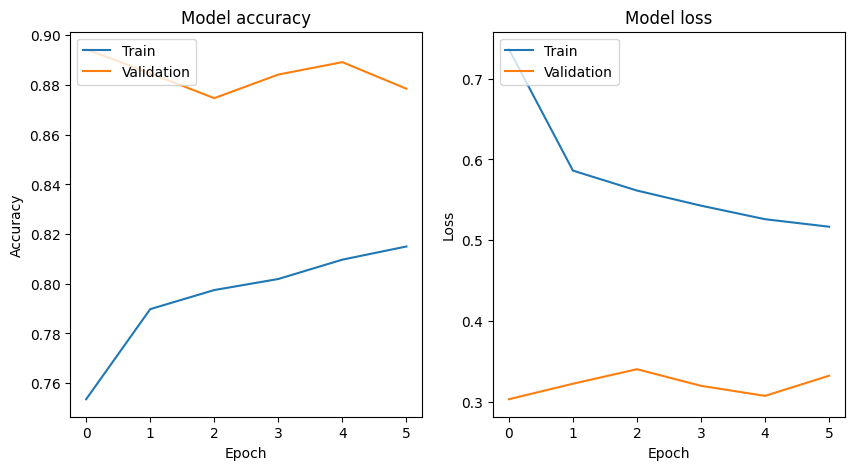

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


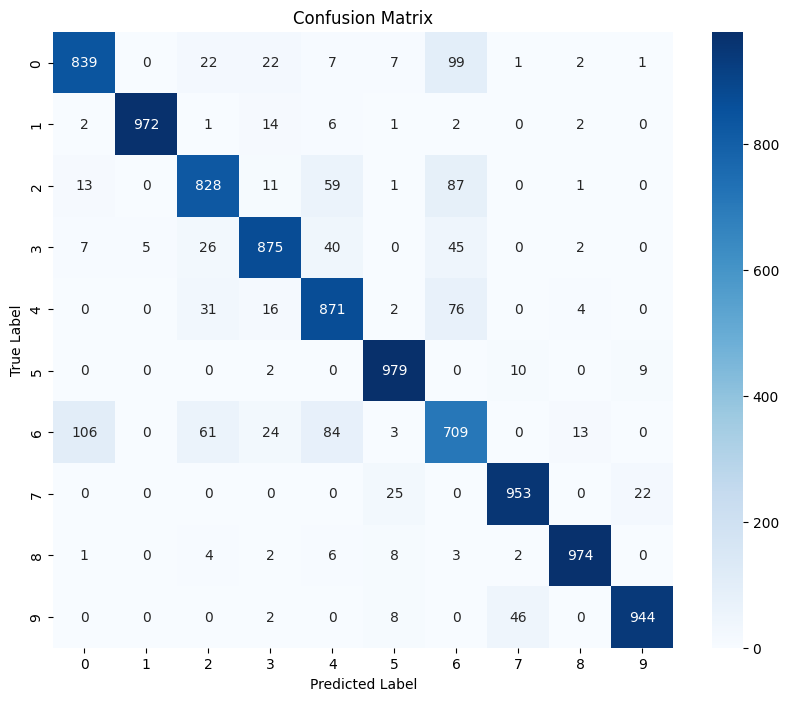

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_augmented.history['accuracy'])
plt.plot(history_augmented.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_augmented.history['loss'])
plt.plot(history_augmented.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Étape 8 : Sauvegarde et Utilisation du Modèle

In [ ]:


import numpy as np
# Save the trained model
model.save('fashion_mnist_model.h5')
print("Modèle sauvegardé avec succès.")

# Load the saved model
loaded_model = tf.keras.models.load_model('fashion_mnist_model.h5')
print("Modèle chargé avec succès.")

# Example usage: Predict the class of a single image
# Assuming X_test[0] is the image you want to test.
# Make sure to reshape it to (1, 28, 28, 1).
single_image = X_test[0].reshape(1, 28, 28, 1)
prediction = loaded_model.predict(single_image)
predicted_class = np.argmax(prediction)
print(f"Classe prédite: {predicted_class}")


Modèle sauvegardé avec succès.
Modèle chargé avec succès.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
Classe prédite: 9
